# Lab 03: Basic Image Processing 2
Name: **Raja Hasnain Anwar** <br/>
Registration: **192135**

In [1]:
import numpy as np
from PIL import Image
import IPython.display as display
import matplotlib.pyplot as plt

# Task 01: Binarization

In [2]:
def binarize(img_path, threshold):
    img = Image.open(img_path).convert('L') # conversion to grayscale
    img_np = np.asarray(img).copy()
    img_np[img_np <  threshold] = 0
    img_np[img_np >=  threshold] = 255
    
    img_bin = Image.fromarray(img_np)
    
    name = img_path.split('.')[-2] + '_binarized'+str(threshold)
    ex = img_path.split('.')[-1]
    
    # uncomment below line if you want to save images on disk
    # img_bin.save(name+'.'+ex)
    return img_bin

## Tests

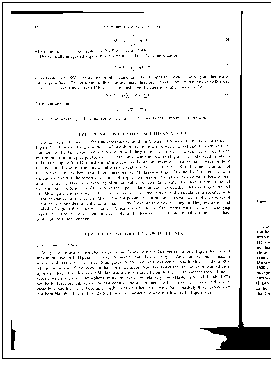

In [3]:
binarize('lab3images/B1.png', 127)

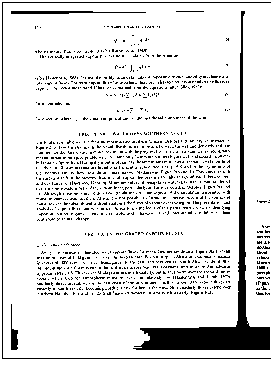

In [4]:
binarize('lab3images/B1.png', 150)

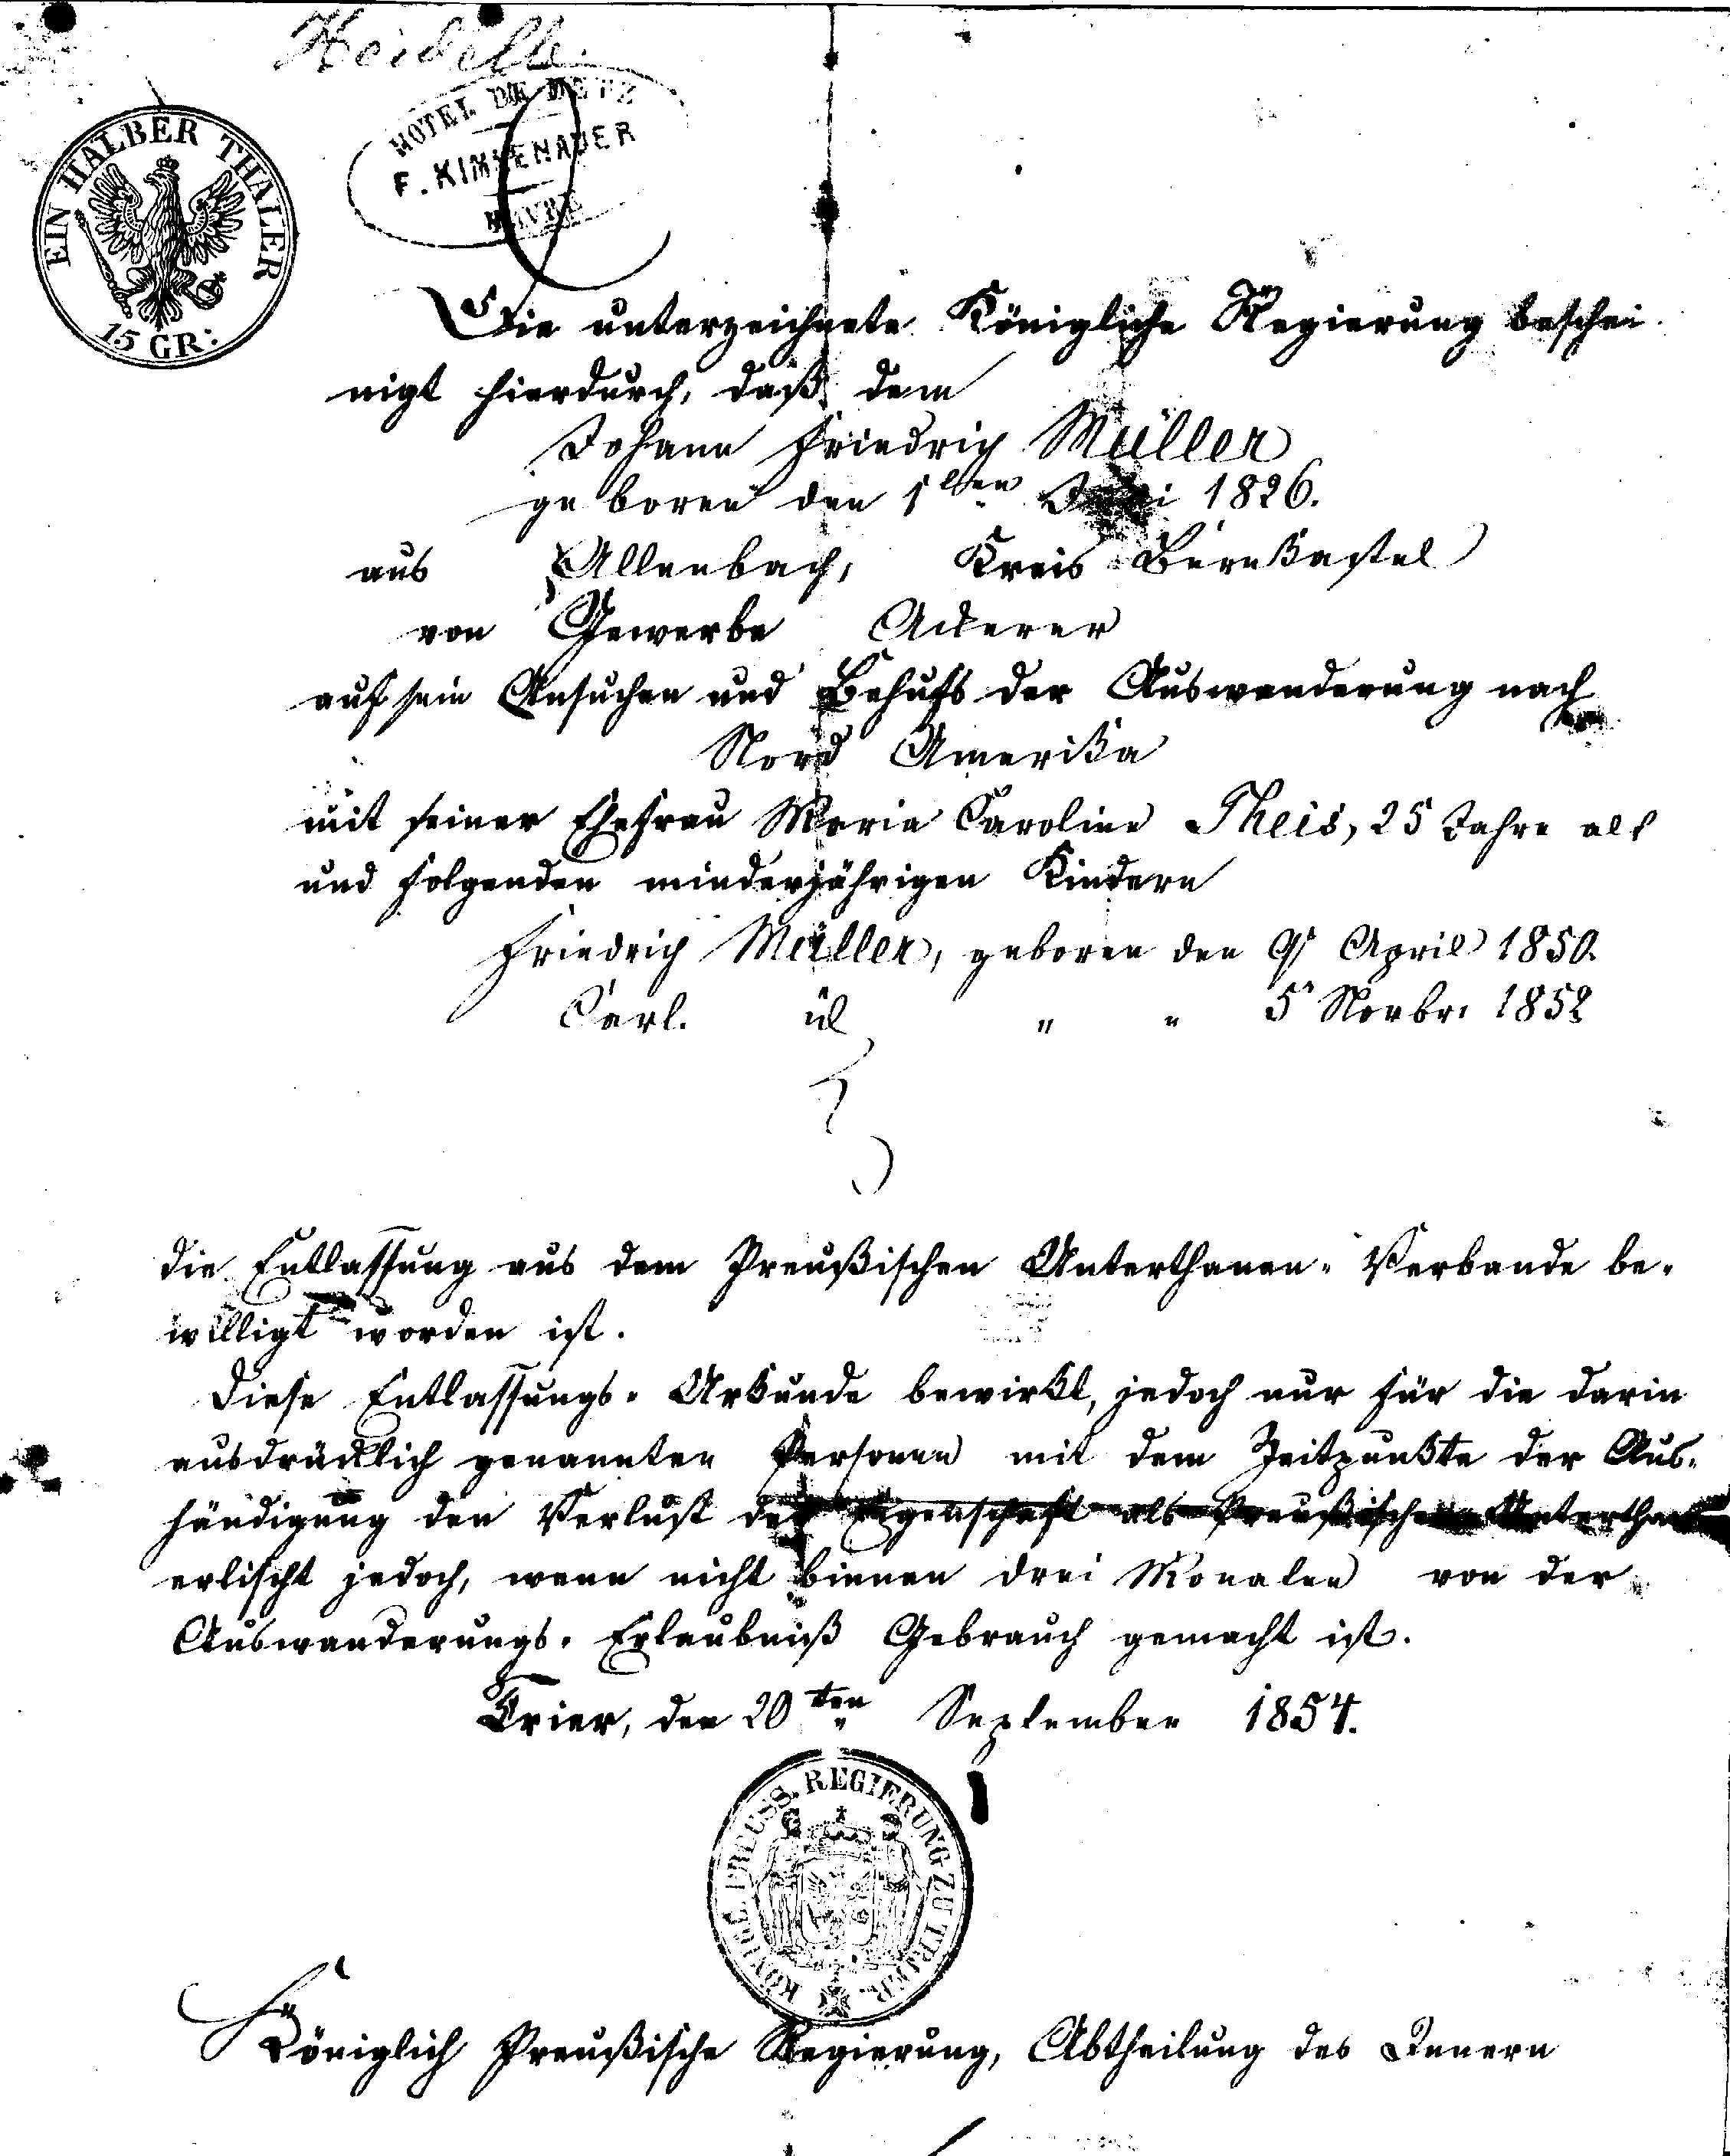

In [5]:
binarize('lab3images/B2.jpg', 132)

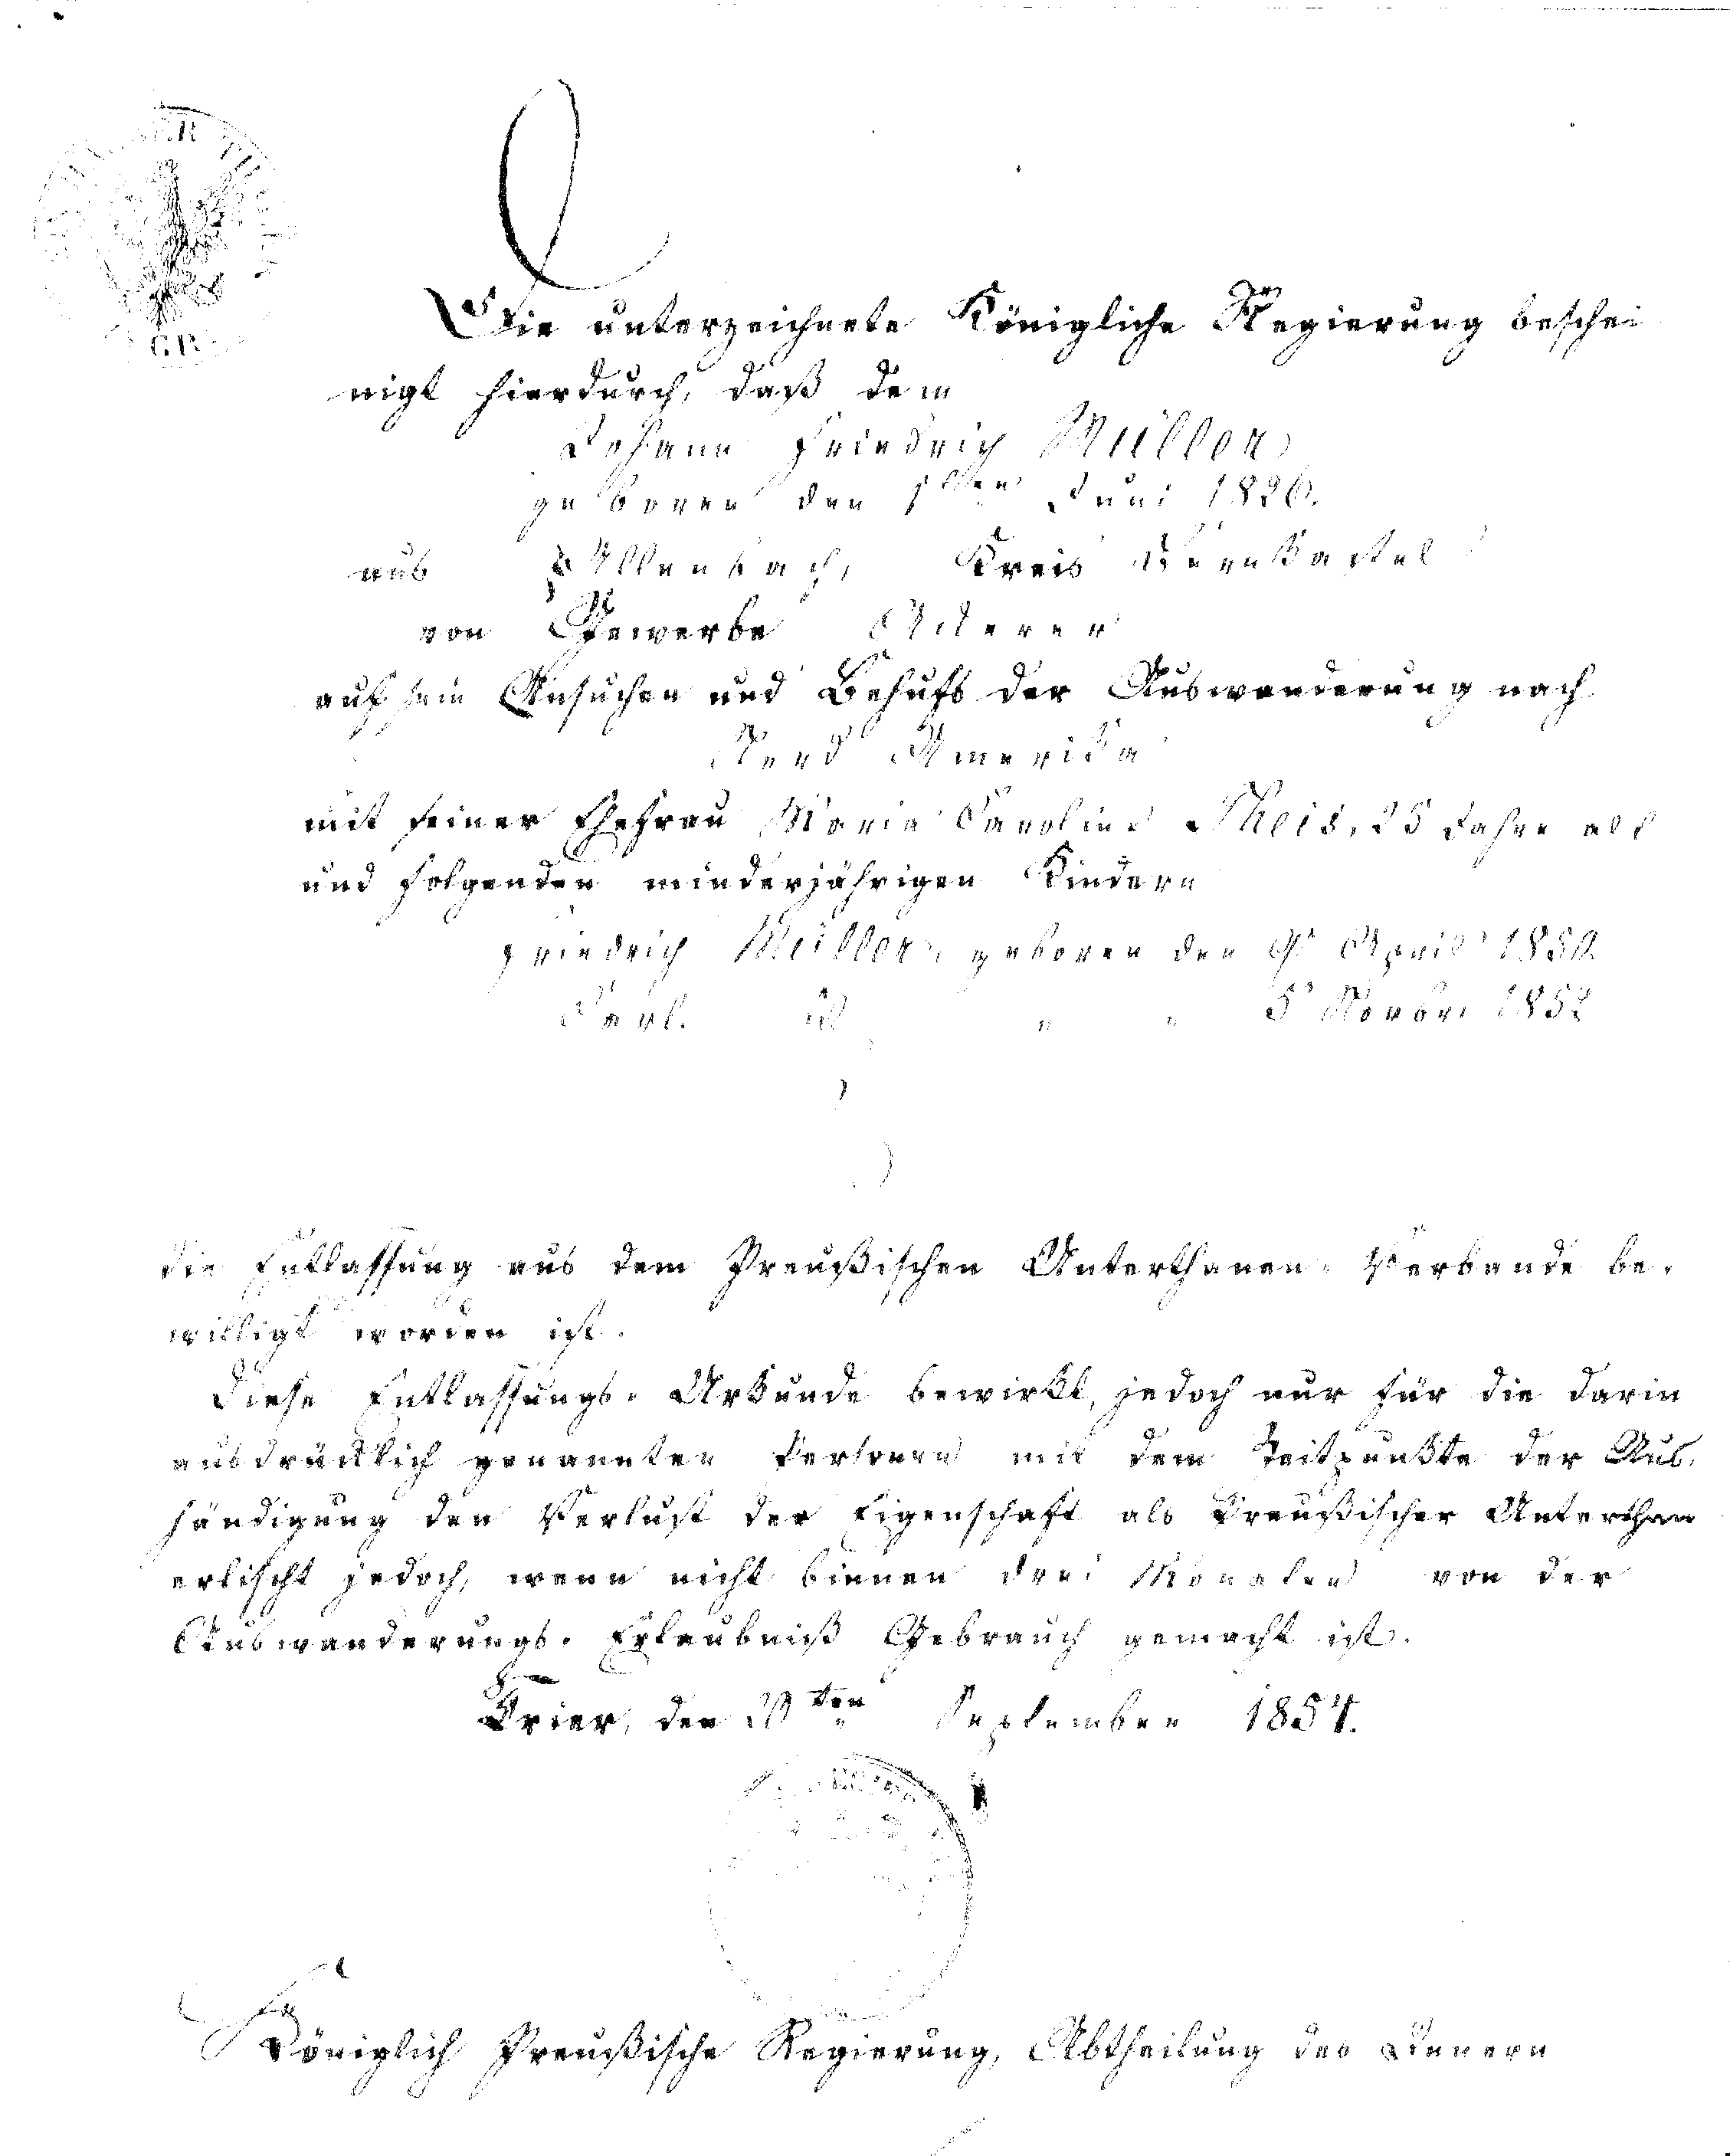

In [6]:
binarize('lab3images/B2.jpg', 12)

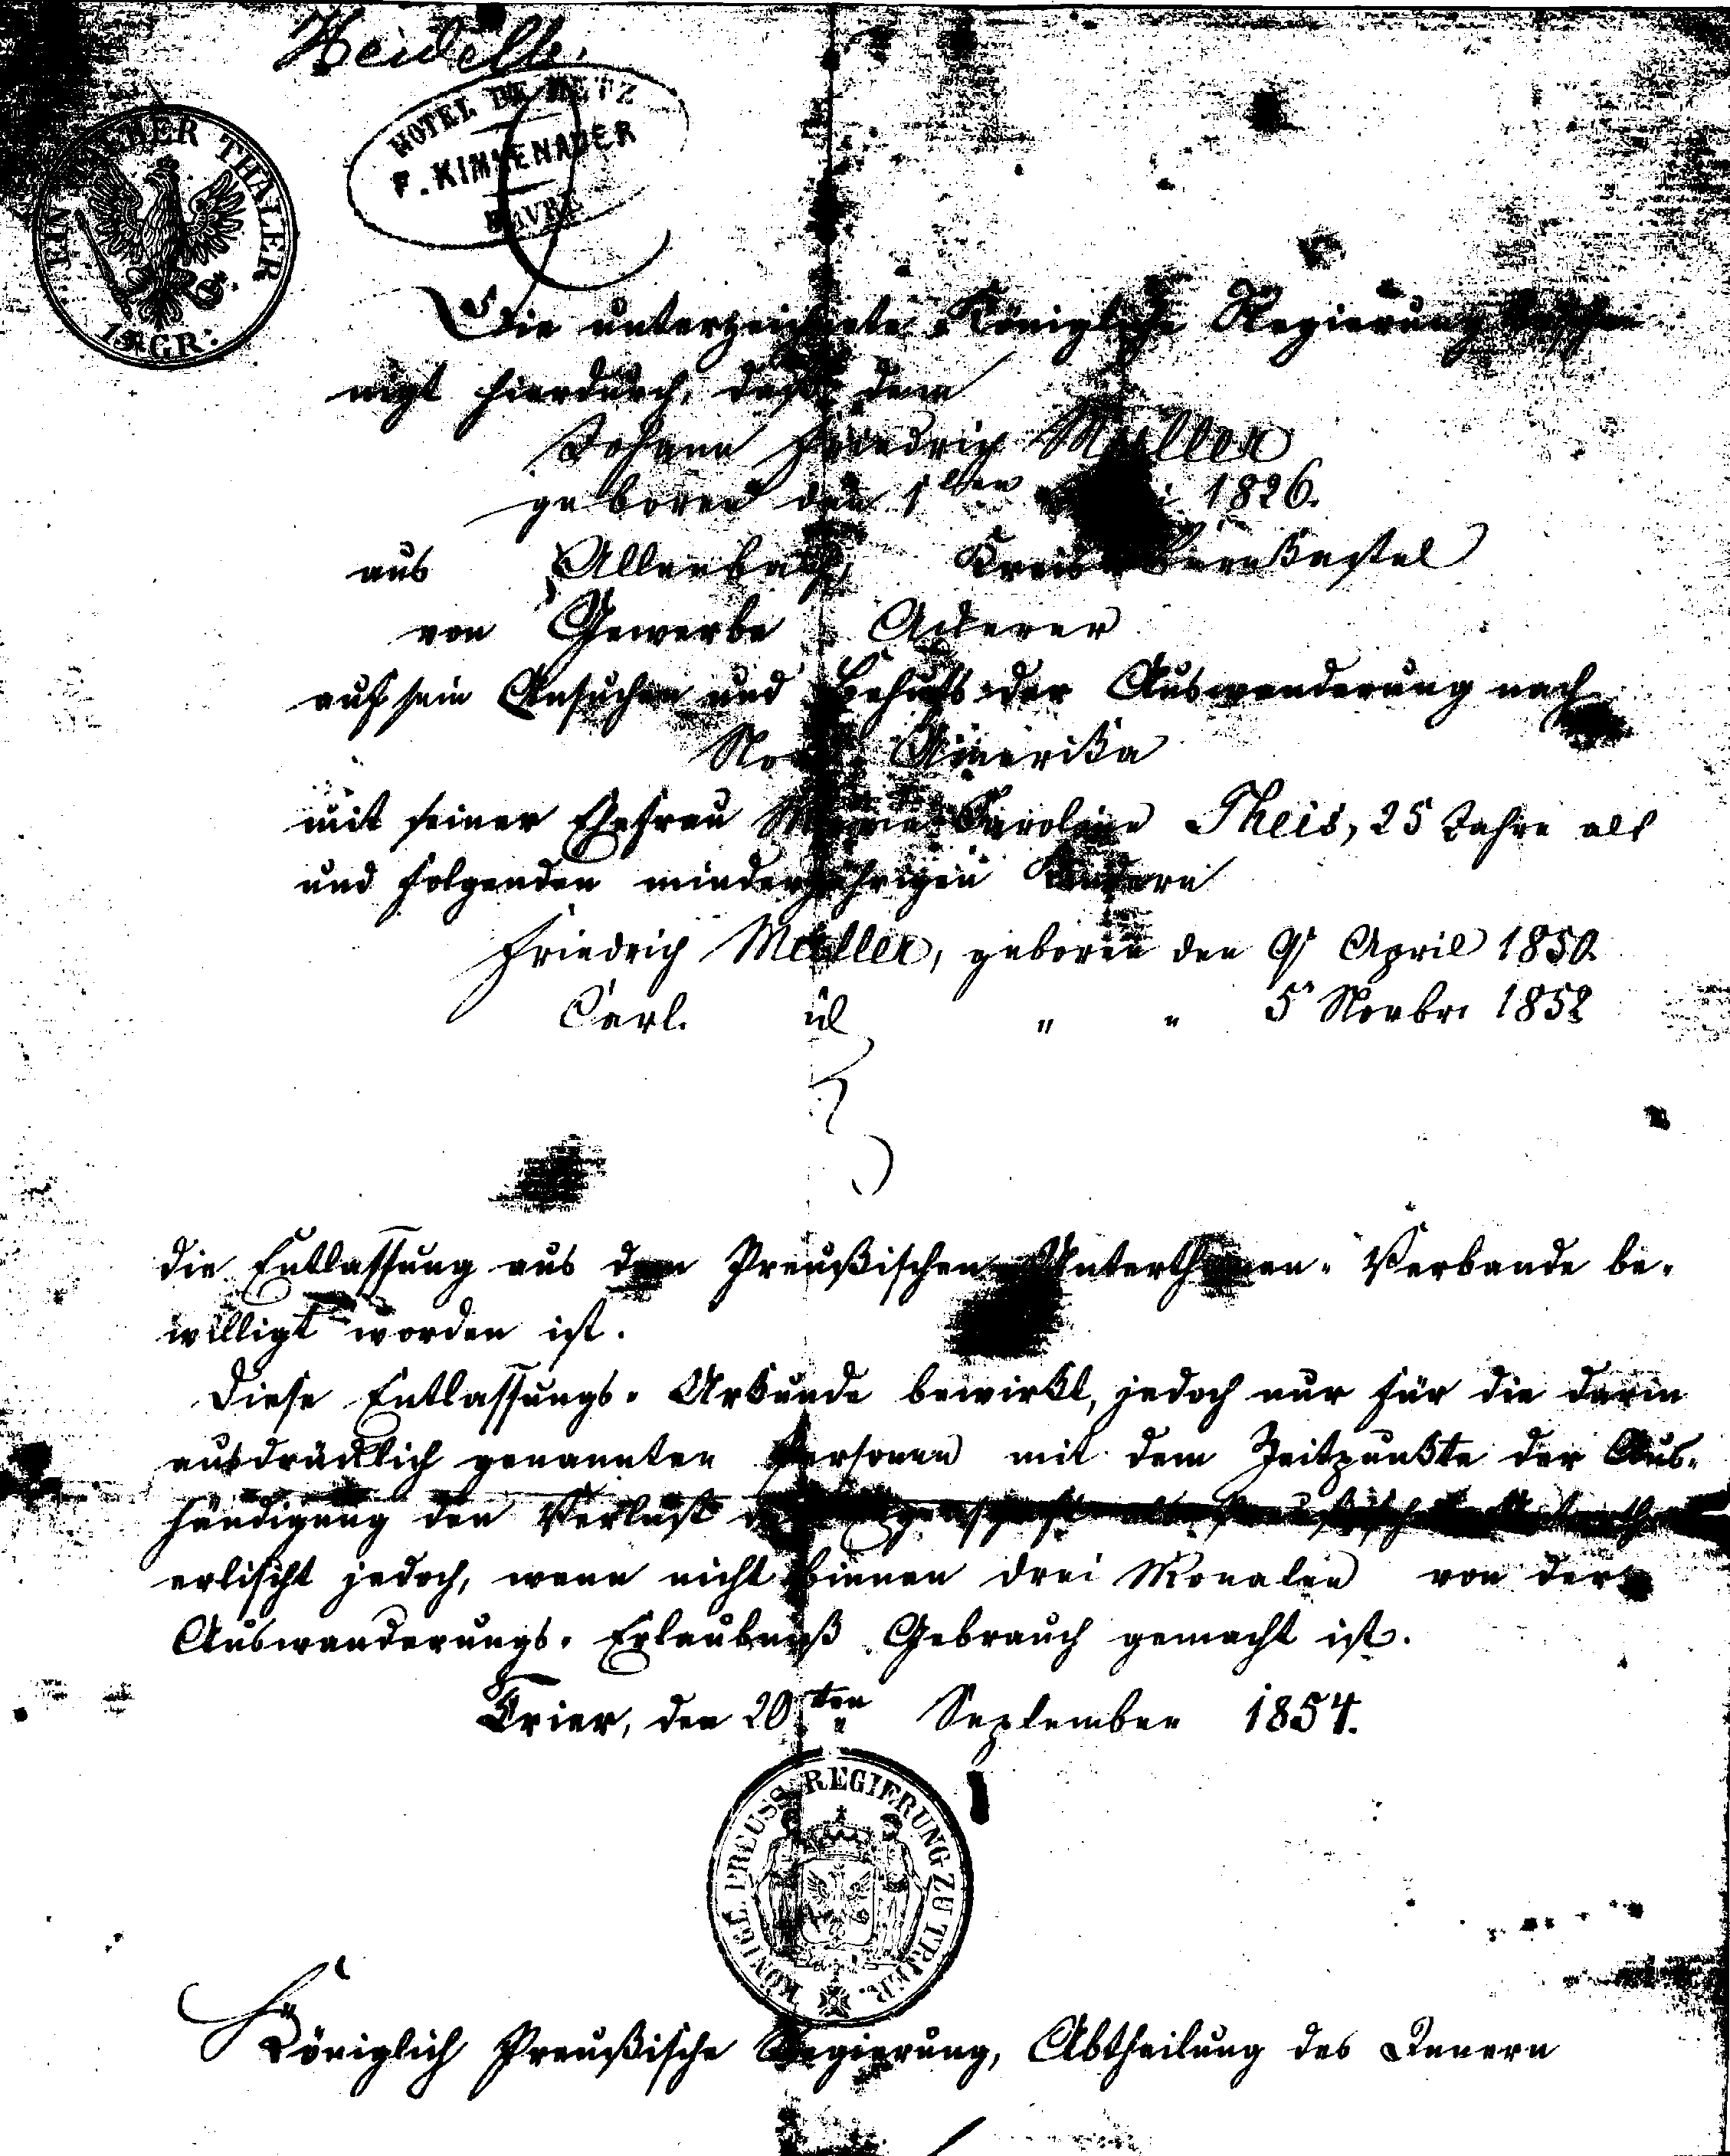

In [7]:
binarize('lab3images/B2.jpg', 170)

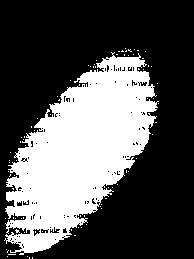

In [8]:
binarize('lab3images/B3.jpg', 132)

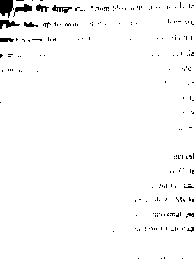

In [9]:
binarize('lab3images/B3.jpg', 32)

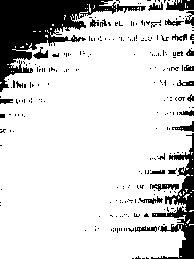

In [10]:
binarize('lab3images/B3.jpg', 50)

# Task 02: Histogram

In [11]:
def histogram(img_path):
    img_gray = Image.open(img_path).convert('L')
    img_gray = np.asarray(img_gray).copy()
    
    c_intensities = np.zeros(256)
    pixels = np.ravel(np.uint8(img_gray))
    
    for intensity in pixels:
        c_intensities[ intensity ] += 1
    
    plt.plot(c_intensities)
    plt.show()

## Tests

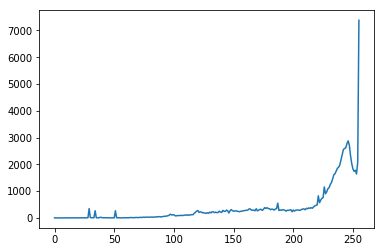

In [12]:
histogram('lab3images/B1.png')

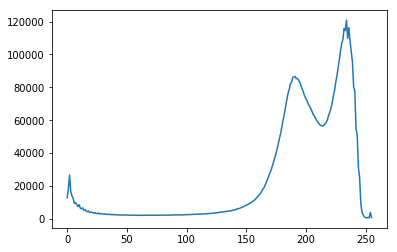

In [13]:
histogram('lab3images/B2.jpg')

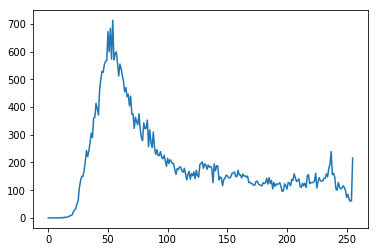

In [14]:
histogram('lab3images/B3.jpg')

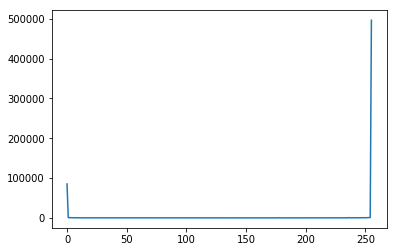

In [15]:
histogram('lab3images/XY-cuts.png')

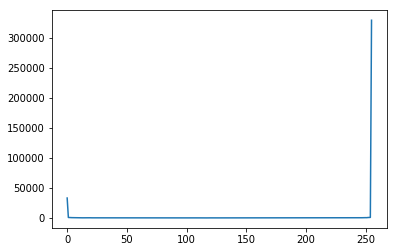

In [16]:
histogram('lab3images/XY-cutss.png')

# Task 03: XY-Cuts

In [17]:
from scipy.signal import find_peaks

In [18]:
def recursiveXYCut(img_path, n):
    image = Image.open(img_path).convert('L')
    image_np = np.asarray(image).copy()
    img_out = image_np.copy()
    
    # for HORIZONTAL - X
    # distance for peaks
    distance = image_np.shape[0]/n
    
    # Sum the pixels along horizontal direction
    sum_vals = image_np.sum(axis = 1)
    
    # Get the indices of the peaks
    peaks, _ = find_peaks(sum_vals, distance=distance)
    
    # draw black line around peaks
    for peak in peaks:
        img_out[range(peak-2, peak+2)] = 0
    
    # for VERTICAL - Y
    
    # distance for peaks
    distance = image_np.shape[1]/n
    
    # Sum the pixels along horizontal direction
    sum_vals = image_np.sum(axis = 0)
    
    # Get the indices of the peaks
    peaks, _ = find_peaks(sum_vals, distance=distance)
    
    # draw black line around peaks
    for peak in peaks:
        img_out[:,range(peak-2, peak+2)] = 0
        
    return Image.fromarray(img_out)

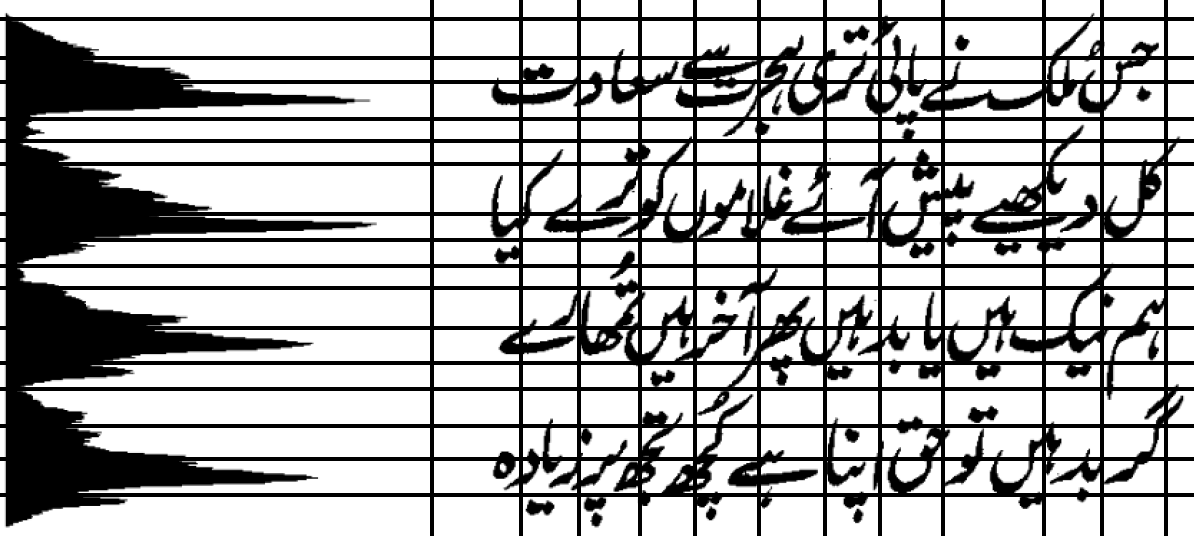

In [19]:
recursiveXYCut('lab3images/XY-cuts.png', 25)

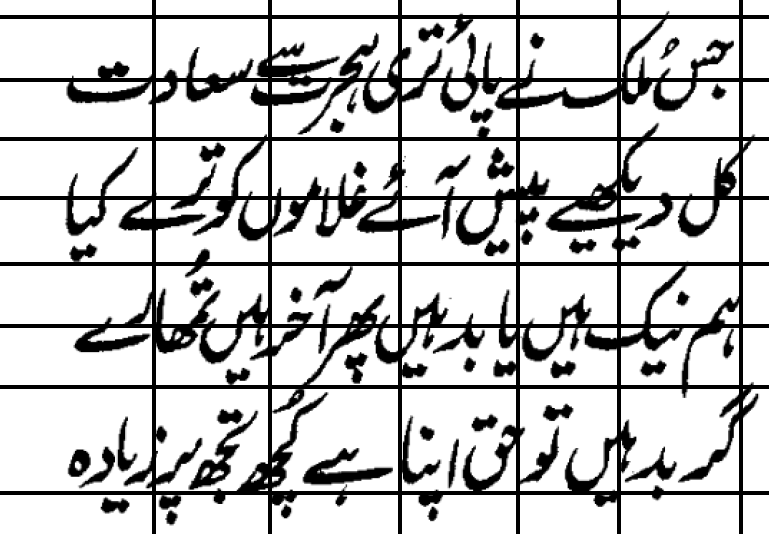

In [20]:
recursiveXYCut('lab3images/XY-cutss.png', 10)